In [198]:
def findMinWithRange(xdata,Idata,error):  

  minimum = np.argmin(Idata)
  minimumsx = minimumdx = minimum
  minimumsxvalue = minimumdxvalue = xdata[minimum]
  for i in range(len(xdata)):
    if(Idata[i]<Idata[minimum]+error):
      if(minimumsxvalue>xdata[i]):
        minimumsxvalue = xdata[i]
        minimumsx = i
      if(minimumdxvalue<xdata[i]):
        minimumdxvalue = xdata[i]
        minimumdx = i

  minimumIndex = np.array([minimumsx,minimumdx])
  
  return minimumIndex

Index rifr from fit
1.489702358960302
0.008405987396447026
Index rifr err graficamente
0.014
Brewster Angle from fit
56.127524184853016
0.2491729760373143
Index I0 from fit
472.3464327016923
4.40295918918537
I0 err graficamente
12
Index rifr from fit parallel
1.4426076965290089
0.03495663776633892
Index rifr err graficamente parallel
0.014
Brewster Angle from fit parallel
55.27072005704085
1.9501380493100318
Index I0 from fit parallel
609.3359184627001
56.56861045706909
I0 err graficamente parallel
169.70583137120727
Brewster Angle data range from minimum dati grezzi
52.0
58.0
Brewster Angle Simulated data mean from minimum dati grezzi
55.0
Brewster Angle Simulated data error from minimum dati grezzi
3.0000000000000013
Refraction Index from minimum dati grezzi
1.4281480067421144
Refraction Index error from minimum dati grezzi
0.09128666075079847


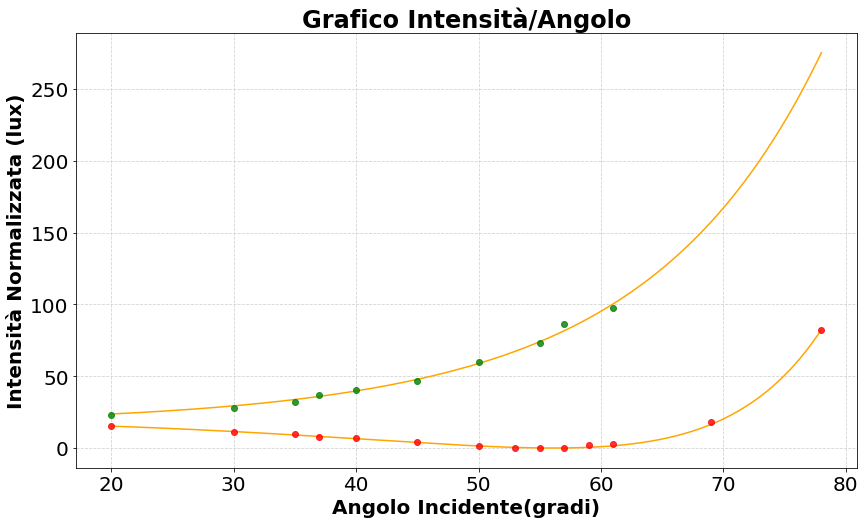

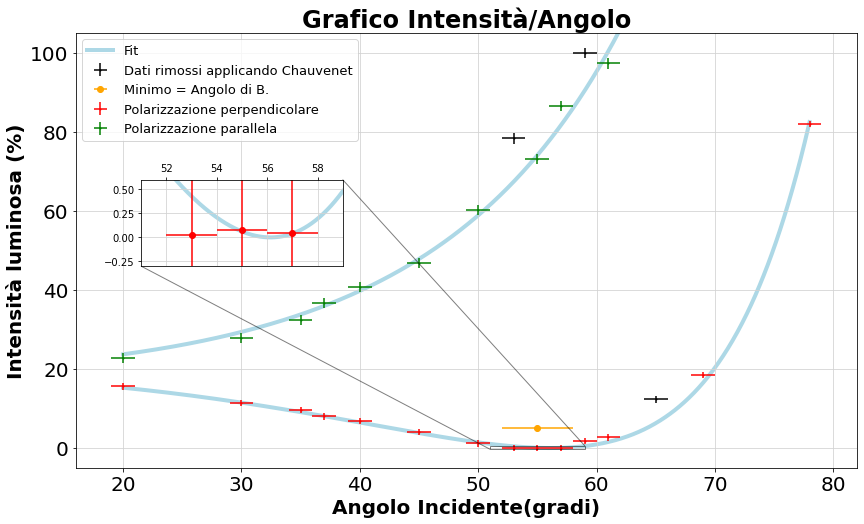

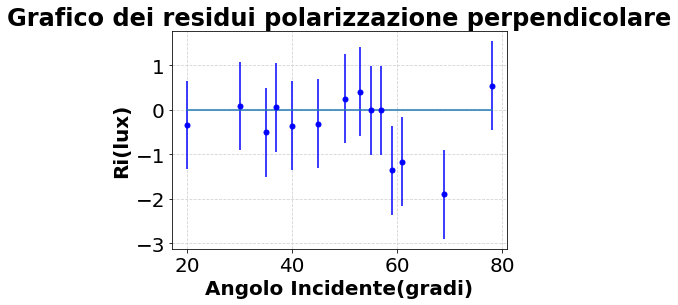

sigma_post_fit
0.7821368049737294
t sigma dalla media polarizzazione perpendicolare
[0.69755055 2.43230042 1.49101686 0.3207594  0.39563909 0.45312527
 0.08093141 0.64622195 0.01526029 0.51858877 0.0063115  1.73660014
 0.43263389 0.11469699]
N*probabilità per la polarizzazione perpendicolare, se <0.1 si può rigettare
[5.59882091 0.37076077 2.34967912 6.78287539 6.60336431 6.44421708
 7.11759197 5.79527544 7.14010848 6.24247819 7.14079768 1.5808369
 6.50296592 7.09412309]


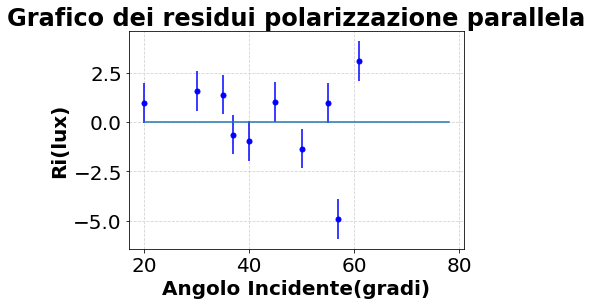

sigma_post_fit
2.2147660474470308
t sigma dalla media polarizzazione parallela
[0.43194338 0.70589137 1.39302237 0.61237563 0.45838623 0.43396751
 0.2932554  0.62275675 0.42776573 2.22359464]
N*probabilità per la polarizzazione parallela, se <0.1 si può rigettare
[1.64084646 1.40404657 0.68266169 1.49331403 1.62164459 1.63940912
 1.72547163 1.48377097 1.64379571 0.15202858]


In [197]:
#ANALISI

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
#indice di rifrazione simulato
n = 1.4281480067421144
#Brewster angle simulato
theta = 56.34177390487406

def simulation(thetai, thetat):
  return (np.tan(thetai-thetat)**2/np.tan(thetai+thetat)**2)
def simulationPerpendicular(thetai, thetat):
  return (np.sin(thetai-thetat)**2/np.sin(thetai+thetat)**2)
def fitting(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fitting1(thetai, indexrifr, I0):
  return I0*(np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fitting3(thetai, indexrifr, I0):
  return I0*(np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fittingPerpendicular(thetai, indexrifr):
  return (np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)

#simulation
thetai = np.linspace(0.01,np.pi/2,1000)
thetat = np.arcsin(np.sin(thetai)/n)

Isimulated = simulation(thetai,thetat)
Isimulated2 = simulationPerpendicular(thetai,thetat)
Itot = Isimulated+Isimulated2

Isimulated = Isimulated/Itot
Isimulated2 = Isimulated2/Itot


min = np.argmin(Isimulated)
max = np.argmax(Isimulated2)


#input data
#Idata1 = Idata = np.array([0.9,0.5,0.1,0.5,3.8,30.5,2.1,3.5,4.1,6.9,8.4,0.,0.1])/100
#Idata12 = Idata2 = np.array([10.6,16.8,30.1,42.8,67.2,101.1,14.4,14.1,10.3,13.9,12.8,5.9,11.1])/100

#Idata1 = Idata = np.array([81.9,18.4,2.7,0.87,0.573,0.114,15.6,1.18,4.1,6.82])
Idata1 = Idata = np.array([81.9,18.4,2.7,1.18,4.1,6.82,8,9.6,0.073,0.022,0.0452,1.84,12.3,15.6,11.4])
Idata1 = Idata = np.array([81.9,18.4,2.7,1.18,4.1,6.82,8,9.6,0.073,0.022,0.0452,1.84,15.6,11.4])
#Idata12 = Idata2 = np.array([101.1,101.1,97.3,59.6,40.9,27.8,22.75,60.2,46.8,40.7])
Idata12 = Idata2 = np.array([101.1,101.1,97.3,60.2,46.8,40.7,36.6,32.4,73.1,78.3,86.6,99.9,101.1,22.75,27.8])



Angle = np.array([12,21,29,40,49,60,70,40,45,50])
Angle = 90-np.array([12,21,29,40,45,50,53,55,35,37,33,31,70,60])
#Angle = np.array([46.,51.,56.,61.,66.,76.,41.,36.,31.,26.,21.,58.5,53.5])
Angle = Angle/180*np.pi
Angle_err = 1
Idata_err = 1
#fitting

popt, pcov = scipy.optimize.curve_fit(fitting1, Angle, Idata1, p0 = np.array([n,500]), sigma=0.8*np.ones(len(Idata1)))
indexrifr_err,I0_err = np.sqrt(np.diag(pcov))
indexrifr,I0 = popt

#print fitting result
print('Index rifr from fit')
print(indexrifr)
print(indexrifr_err)
print('Index rifr err graficamente')
indexrifr_err = 0.014
print(indexrifr_err)
print('Brewster Angle from fit')
print(np.arctan(indexrifr)*180/np.pi)
print(1/(1+indexrifr**2)*indexrifr_err*180/np.pi)
print('Index I0 from fit')
print(I0)
print(I0_err)
print('I0 err graficamente')
I0_err = 12
print(I0_err)
Angle1cut = (90-np.array([70,60,29,40,45,50,53,55,35,37,33,31]))
Idata2cut = np.array([22.75,27.8,97.3,60.2,46.8,40.7,36.6,32.4,73.1,78.3,86.6,99.9])
Angle1cut = (90-np.array([70,60,29,40,45,50,53,55,35,33]))
Idata2cut = np.array([22.75,27.8,97.3,60.2,46.8,40.7,36.6,32.4,73.1,86.6])
#fitting dati paralleli
popt, pcov = scipy.optimize.curve_fit(fitting3, Angle1cut/180*np.pi,Idata2cut , p0 = np.array([n,I0]), sigma=1.3*np.ones(len(Idata2cut)))
indexrifr_err1,I0_err1 = np.sqrt(np.diag(pcov))
indexrifr1,I01 = popt

#print fitting result
print('Index rifr from fit parallel')
print(indexrifr1)
print(indexrifr_err1)
print('Index rifr err graficamente parallel')
indexrifr_err1 *= 3
print(indexrifr_err)

print('Brewster Angle from fit parallel')
print(np.arctan(indexrifr1)*180/np.pi)
print(1/(1+indexrifr1**2)*indexrifr_err1*180/np.pi)
print('Index I0 from fit parallel')
print(I01)
print(I0_err1)
print('I0 err graficamente parallel')
I0_err1 *= 3
print(I0_err1)

#plot data
x = np.linspace(np.min(Angle),np.max(Angle),1000)
x1 = np.arcsin(np.sin(x)/(indexrifr))
Idatafit1 = Idatafit = simulation(x,x1)
x3 = np.arcsin(np.sin(x)/indexrifr1)
Idatafitparallel = simulationPerpendicular(x,x3)


fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
#plt.ylim(0,20)
plt.title("Grafico Intensità/Angolo",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Intensità Normalizzata (lux)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(x*180/np.pi,Idatafit1*I0, color = 'orange')
plt.plot(x*180/np.pi,Idatafitparallel*I01, color = 'orange')
plt.errorbar(Angle*180/np.pi,Idata,color='red', label='Fitting',fmt='o', linewidth=5, alpha=0.8)
plt.errorbar(Angle1cut,Idata2cut,color='green', label='Fitting',fmt='o', linewidth=5, alpha=0.8)



#print data result dati grezzi
minimum = findMinWithRange(Angle,Idata,0.1)

print('Brewster Angle data range from minimum dati grezzi')
print(Angle[minimum[0]]*180/np.pi-Angle_err)
print(Angle[minimum[1]]*180/np.pi+Angle_err)

print('Brewster Angle Simulated data mean from minimum dati grezzi')
BrewsterDataAngle = (Angle[minimum[0]]+Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated data error from minimum dati grezzi')
BrewsterDataAngleErr = np.abs(Angle[minimum[0]]-2*Angle_err/180*np.pi-Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index from minimum dati grezzi')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error from minimum dati grezzi')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi)

#graphs with zoom

fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20, 'font.weight':'normal'})
ax = fig.gca()
#ax.set_xticks(np.arange(min(Angletot),max(Angletot)*1.5, 10)
plt.title("Grafico Intensità/Angolo",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Intensità luminosa (%)",fontweight="bold")
plt.ylim(-5,105)
plt.grid(color='lightgray',linestyle="-",zorder=0)

plt.plot(x*180/np.pi,Idatafitparallel*(I01), color = 'lightblue', label='Fit', linewidth=4,zorder=0)
plt.plot(x*180/np.pi,Idatafit*(I0), color = 'lightblue', linewidth=4,zorder=0)

plt.errorbar(np.array([90-25]),np.array([12.3]),xerr=Angle_err,yerr=0.8,color='black',label='Dati rimossi applicando Chauvenet', fmt='o',markersize=1)
plt.errorbar(90-np.array([37,31]),np.array([78.3,99.9]),xerr=Angle_err,yerr=1.3,color='black', fmt='o',markersize=1)
#plt.fill_between(np.linspace(Angle[minimum[0]]*180/np.pi-Angle_err,Angle[minimum[1]]*180/np.pi+Angle_err,100),np.zeros(100),np.ones(100)*20,color='orange',label='Minimo', alpha=0.3)
plt.errorbar(BrewsterDataAngle,5,xerr=BrewsterDataAngleErr, color='orange', label='Minimo = Angolo di B.', fmt='o')
plt.errorbar(Angle*180/np.pi,Idata,xerr=Angle_err,yerr=0.8,color='red', label='Polarizzazione perpendicolare',fmt='o',markersize=1)
plt.errorbar(Angle1cut,Idata2cut,xerr=Angle_err,yerr=1.3,color='green', label='Polarizzazione parallela',fmt='o',markersize=1)

#plt.fill_between(x*180/np.pi,simulation(x,np.arcsin(np.sin(x)/(indexrifr+indexrifr_err)))*(I0+I0_err),simulation(x,np.arcsin(np.sin(x)/(indexrifr-indexrifr_err)))*(I0-I0_err), color='lightblue', label='Fit')
#plt.fill_between(x*180/np.pi,simulationPerpendicular(x,np.arcsin(np.sin(x)/(indexrifr1-indexrifr_err1)))*(I01+I0_err1),simulationPerpendicular(x,np.arcsin(np.sin(x)/(indexrifr1+indexrifr_err1)))*(I01-I0_err1), color='lightblue')
#plt.fill_between(x*180/np.pi,Idatafitparallel*(I01),simulationPerpendicular(x,np.arcsin(np.sin(x)/(indexrifr1+indexrifr_err1)))*(I01-I0_err1), color='lightblue')

plt.legend(loc="best",prop={'size': 13})

X_detail = np.linspace(51, 59, 1000)
X_detail = X_detail/180*np.pi
x1 = np.arcsin(np.sin(X_detail)/indexrifr)
Y_detail = Idatafit = fitting1(X_detail,indexrifr,I0)
# location for the zoomed portion 
sub_axes = plt.axes([.19, .475, .2, .15]) 
sub_axes.xaxis.tick_top()
sub_axes.set_ylim([-0.3, 0.6])
sub_axes.set_xlim([51, 59])
sub_axes.tick_params(axis='both', which='major', labelsize=10)
plt.errorbar((90-np.array([35,37,33])),np.array([0.073,0.022,0.0452]),xerr=Angle_err,yerr=0.8,color='red', label='Dati',fmt='o')
#sub_axes.fill_between(x*180/np.pi,simulation(x,np.arcsin(np.sin(x)/(indexrifr+indexrifr_err)))*(I0+I0_err),simulation(x,np.arcsin(np.sin(x)/(indexrifr-indexrifr_err)))*(I0-I0_err), color='lightblue')
sub_axes.plot(X_detail*180/np.pi,Y_detail, color="lightblue",label="Fit", linewidth=4,zorder=0)
#sub_axes.fill_between(np.linspace(Angle[minimum[0]]*180/np.pi-Angle_err,Angle[minimum[1]]*180/np.pi+Angle_err,100),np.zeros(100),np.ones(100)*2,color='orange',label='Minimo')
# plot the zoomed portion
sub_axes.grid(color='lightgray',linestyle="-",zorder=0)
#sub_axes.legend(loc="upper right",prop={'size': 10})
ax.indicate_inset_zoom(sub_axes, edgecolor="black")
plt.show()
fig.savefig(f'Grafico_Brewster_Angle.pdf',dpi = 300)

#grafico residui perpendicolare

Ff = fitting1(Angle,indexrifr,I0)

Ri2 = Ff-Idata1



fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui polarizzazione perpendicolare",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Ri(lux)",fontweight="bold")
plt.plot(np.linspace(np.min(Angle*180/np.pi),np.max(Angle*180/np.pi),1000),np.zeros(1000))
plt.errorbar(Angle*180/np.pi, Ri2, markersize = 5, color="blue", yerr=Idata_err, fmt='o')
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET2.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-Idata1)**2)/(len(Ff)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

t = np.abs(Ri2)/sigma_post_fit
print('t sigma dalla media polarizzazione perpendicolare')
print(t)
print('N*probabilità per la polarizzazione perpendicolare, se <0.1 si può rigettare')
print(scipy.stats.norm(Ff,sigma_post_fit).pdf(Idata1)*len(Idata1))

#grafico residui parallela


Ff = fitting3(Angle1cut/180*np.pi,indexrifr1,I01)

Ri2 = Ff-Idata2cut



fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui polarizzazione parallela",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Ri(lux)",fontweight="bold")
plt.plot(np.linspace(np.min(Angle*180/np.pi),np.max(Angle*180/np.pi),1000),np.zeros(1000))
plt.errorbar(Angle1cut, Ri2, markersize = 5, color="blue", yerr=Idata_err, fmt='o')
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET2.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-Idata2cut)**2)/(len(Ff)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

t = np.abs(Ri2)/sigma_post_fit
print('t sigma dalla media polarizzazione parallela')
print(t)
print('N*probabilità per la polarizzazione parallela, se <0.1 si può rigettare')
print(scipy.stats.norm(Ff,sigma_post_fit).pdf(Idata2cut)*len(Idata2cut))

In [ ]:

Idatatot = Idata+Idata2
Idata = Idata/Idatatot
Idata2 = Idata2/Idatatot

#print data result
minimum = findMinWithRange(Angle,Idata,0.01)
maximum = findMaxWithRange(Angle,Idata2,0.01)

print('Brewster Angle data range from minimum')
print(Angle[minimum[0]]*180/np.pi)
print(Angle[minimum[1]]*180/np.pi)

print('Brewster Angle Simulated data mean from minimum')
BrewsterDataAngle = (Angle[minimum[0]]+Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated data error from minimum')
BrewsterDataAngleErr = np.abs(Angle[minimum[0]]-Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index from minimum')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error from minimum')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi)

print('Brewster Angle Simulated from maximum mean')
BrewsterDataAngle = (Angle[maximum[0]]+Angle[maximum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated from maximum error')
BrewsterDataAngleErr = np.abs(Angle[maximum[0]]-Angle[maximum[1]])*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index from maximum')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error from maximum')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi)

#fitting


popt, pcov = scipy.optimize.curve_fit(fittingPerpendicular, Angle, Idata12, p0 = np.array([n]))
indexrifr_errPerp = np.sqrt(np.diag(pcov))
indexrifrPerp = popt

#print fitting result
print('Index rifr from fit perpendicular')
print(indexrifrPerp)
print(indexrifr_errPerp)
print('Brewster Angle from fit perpendicular')
print(np.arctan(indexrifrPerp)*180/np.pi)
print(1/(1+indexrifrPerp**2)*indexrifr_errPerp*180/np.pi)

xPerp = np.linspace(np.min(Angle),np.max(Angle),1000)
x1Perp = np.arcsin(np.sin(xPerp)/indexrifrPerp)
IdatafitPerp = simulation(xPerp,x1Perp)
IdatafitperpendicularPerp = simulationPerpendicular(xPerp,x1Perp)
yPerp = IdatafitPerp/(IdatafitPerp+IdatafitperpendicularPerp)
yperpendicularPerp = IdatafitperpendicularPerp/(IdatafitPerp+IdatafitperpendicularPerp)

#graph
fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
plt.title("Grafico Intensità/Angolo",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Intensità Normalizzata (lux)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(x*180/np.pi,y,color='red', label='Fitting', linewidth=5, alpha=0.8)
plt.plot(x*180/np.pi,yperpendicular,color='red', linewidth=5, alpha=0.8)

#plt.plot(xPerp*180/np.pi,yPerp,color='darkred', label='Fitting Perp', linewidth=5, alpha=0.8)
#plt.plot(xPerp*180/np.pi,yperpendicularPerp,color='darkred', linewidth=5, alpha=0.8)

plt.plot(thetai*360/np.pi/2,Isimulated, zorder=5, color = "orange", label = "Simul parallela", linewidth=3, alpha=0.8)
plt.plot(thetai*360/np.pi/2,Isimulated2, zorder=5, color = "lightgreen", label = "Simul perpendicolare", linewidth=3, alpha=0.8)

plt.errorbar(Angle*360/np.pi/2,Idata,xerr=(0.5/180*np.pi), fmt='o', markersize = 5, zorder=5, color = "blue", label = "Dati parallela")
plt.errorbar(Angle*360/np.pi/2,Idata2,xerr=(0.5/180*np.pi), fmt='o', markersize = 5, zorder=5, color = "green", label = "Dati perpendicolare")
#plt.errorbar(thetai*360/np.pi/2,Itot, fmt='o', markersize = 5, zorder=5, color = "red", label = "Simulated set")
#plt.axvspan(Angle[minimum[0]]*180/np.pi,Angle[minimum[1]]*180/np.pi, alpha=0.5,color='orange',label='Minimum')
plt.fill_between(np.linspace(Angle[minimum[0]]*180/np.pi,Angle[minimum[1]]*180/np.pi,100),np.zeros(100),np.ones(100)*0.5,color='orange',label='Minimo parallela')
plt.fill_between(np.linspace(Angle[maximum[0]]*180/np.pi,Angle[maximum[1]]*180/np.pi,100),np.ones(100),np.ones(100)*0.5,color='lightgreen',label='Massimo perpendicolare')
#plt.plot(thetai*360/np.pi/2,Isimulated, color="red",zorder=1, label = "Simulated Curve")
#plt.plot(IFit,xFit, color="orange",zorder=1, label = "Simulated Fit")
plt.legend(loc="upper left",prop={'size': 13})
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'GraficoMIParte1.pdf',dpi = 300)